# Prédiction des prix de voitures d'occasion

### Import des librairies

In [250]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [251]:
DATA_FOLDER = 'data-society-used-cars-data/data/'

data = pd.read_csv(DATA_FOLDER+'autos.csv')

In [252]:
data.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24T00:00:00,False,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17T00:00:00,False,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21


On observe dans un premier temps que certaines variables sont en Allemand, nous commonçons donc par traduire ces champs.

In [253]:
# Traduction de l'Allemand vers le Français 
from translate import Translator

translator = Translator(from_lang="german",to_lang="french")

def translate(translator, s):
    if s is None:
        return None
    return translator.translate(s)

In [254]:
data['offertype'] = data['offertype'].apply(lambda s : translate(translator, s))
data['seller'] = data['seller'].apply(lambda s : translate(translator, s))
data['gearbox'] = data['gearbox'].apply(lambda s : translate(translator, s))
data['vehicletype'] = data['vehicletype'].apply(lambda s : translate(translator, s))
data['fueltype'] = data['fueltype'].apply(lambda s : translate(translator, s))
data['notrepaireddamage'] = data['notrepaireddamage'].apply(lambda s : translate(translator, s))

In [255]:
data.head()

,datecrawled,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,datecreated,nrofpictures,postalcode,lastseen
0,2016-03-24T11:52:17,Golf_3_1.6,Privé,Offre,480,test,None,1993,manuelle,0,golf,150000,0,ESSENCE,volkswagen,None,2016-03-24T00:00:00,False,70435,2016-04-07T03:16:57
1,2016-03-24T10:58:45,A5_Sportback_2.7_Tdi,Privé,Offre,18300,test,COUPE,2011,manuelle,190,NaN,125000,5,Diesel,audi,oui,2016-03-24T00:00:00,False,66954,2016-04-07T01:46:50
2,2016-03-14T12:52:21,"Jeep_Grand_Cherokee_""Overland""",Privé,Offre,9800,test,SUV,2004,Automatique,163,grand,125000,8,Diesel,jeep,None,2016-03-14T00:00:00,False,90480,2016-04-05T12:47:46
3,2016-03-17T16:54:04,GOLF_4_1_4__3TÜRER,Privé,Offre,1500,test,citadine,2001,manuelle,75,golf,150000,6,ESSENCE,volkswagen,non,2016-03-17T00:00:00,False,91074,2016-03-17T17:40:17
4,2016-03-31T17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,Privé,Offre,3600,test,citadine,2008,manuelle,69,fabia,90000,7,Diesel,skoda,non,2016-03-31T00:00:00,False,60437,2016-04-06T10:17:21


In [256]:
# Informations concernant les champs de données (type de données, valeurs nulles)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   datecrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offertype            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicletype          330302 non-null  object
 7   yearofregistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerps              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthofregistration  371528 non-null  int64 
 13  fueltype             338142 non-null  object
 14  brand                371528 non-null  object
 15  notrepaireddamage    299468 non-nu

Pour les variables datecrawled et lastseen, nous ne pouvons pas les utiliser directement dans notre analyse (à cause de leur type). Cependant il serait intéressant de considérer la relation entre les deux pour determiner combien de temps une voiture reste en ligne avant d'être vendue. Il est également important de noter que nous avons choisi datecrawled au lieu de datecreated, car c'est à partir du moment ou l'annonce est crawled qu'elle peut-être visible pour les visiteurs.

In [257]:
from datetime import datetime

# Temps en secondes
data['time_online'] = data['lastseen'].apply(lambda s : datetime.strptime(s, '%Y-%m-%dT%H:%M:%S')) - data['datecrawled'].apply(lambda s : datetime.strptime(s, '%Y-%m-%dT%H:%M:%S'))
data['time_online'] = data['time_online'].apply(lambda x : x.total_seconds())

De plus il serait intéressant d'ajouter le mois et l'année durant lesquels l'annonce a été publiée.

In [258]:
data['year_published'] = data['datecreated'].apply(lambda s : datetime.strptime(s, '%Y-%m-%dT%H:%M:%S').year)
data['month_published'] = data['datecreated'].apply(lambda s : datetime.strptime(s, '%Y-%m-%dT%H:%M:%S').month)

Nous n'avons ainsi plus besoin des variables datecrawled, lastseen ainsi que datecreated

In [349]:
df = data.drop(columns=['datecrawled', 'lastseen', 'datecreated'])

### Champs à données manquantes et stratégie d'imputation

In [261]:
# Informations concernant les données manquantes pour chaque champs
df.isnull().sum()

name                       0
seller                     0
offertype                  0
price                      0
abtest                     0
vehicletype            41226
yearofregistration         0
gearbox                20209
powerps                    0
model                  20484
kilometer                  0
monthofregistration        0
fueltype               33386
brand                      0
notrepaireddamage      72060
nrofpictures               0
postalcode                 0
time_online                0
year_published             0
month_published            0
dtype: int64

<AxesSubplot: >

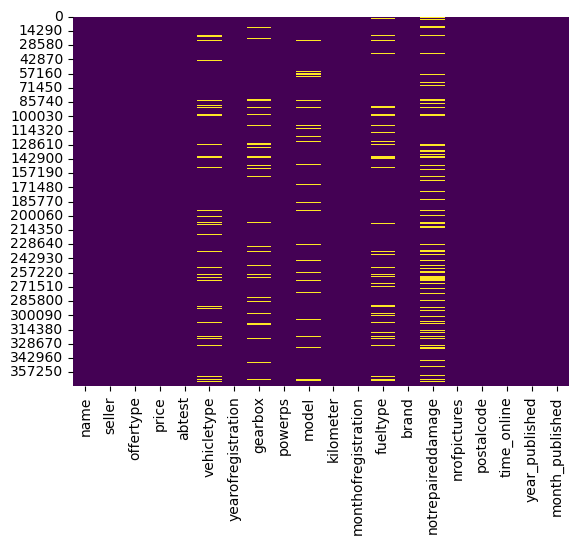

In [137]:
# Heatmap des valeurs manquantes
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

#### On observe que les champs suivants ont des données manquantes :
- vehicletype
- gearbox
- model
- fueltype
- notrepaireddamage

Tous ces champs sont catégorielles.

Calculons le pourcentage de données manquantes pour chaque variable

In [262]:
print('Le pourcentage de données manquantes pour vehicletype est : ', (df['vehicletype'].isnull().sum() / len(data)) * 100)
print('Le pourcentage de données manquantes pour gearbox est : ', (df['gearbox'].isnull().sum() / len(data)) * 100)
print('Le pourcentage de données manquantes pour fueltype est : ', (df['fueltype'].isnull().sum() / len(data)) * 100)
print('Le pourcentage de données manquantes pour model est : ', (df['model'].isnull().sum() / len(data)) * 100)
print('Le pourcentage de données manquantes pour notrepaireddamage est : ', (df['notrepaireddamage'].isnull().sum() / len(data)) * 100)

Le pourcentage de données manquantes pour vehicletype est :  11.096337288172089
Le pourcentage de données manquantes pour gearbox est :  5.439428522210978
Le pourcentage de données manquantes pour fueltype est :  8.986132942873754
Le pourcentage de données manquantes pour model est :  5.513447169526926
Le pourcentage de données manquantes pour notrepaireddamage est :  19.395577183953833


On observe que pour vehicletype, gearbox, fueltype et model, il y a moins de 10.2% de données manquantes, ce qui n'est pas élevé. Cependant il serait intéressant d'étudier la distribution de la variable not repaired dammage avant de choisir une stratégie d'imputation.

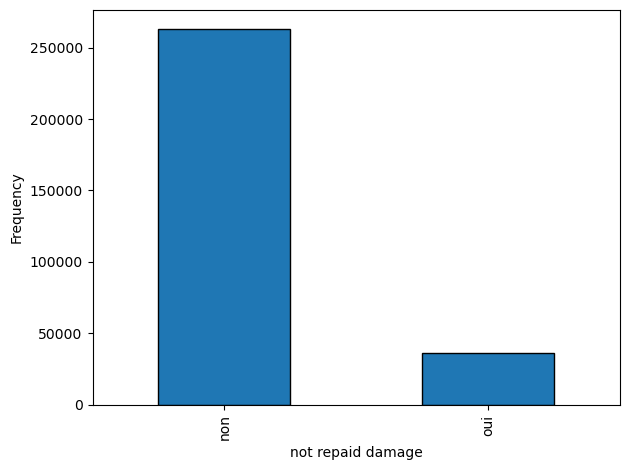

In [139]:
df['notrepaireddamage'].value_counts().plot(kind='bar', edgecolor='k')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.xlabel('not repaid damage')
plt.tight_layout()

In [140]:
# Pourcentage de oui et de non pour la variable not repaired dammage
df['notrepaireddamage'].value_counts()/len(df)

non    0.708377
oui    0.097667
Name: notrepaireddamage, dtype: float64

On remarque que pour cette variable 70% des données corresponde à oui et seulement un peu moins de 10% à non.

Concernant les stratégies d'imputation, les données étant catégorielles, nous pouvons soit supprimer ces lignes (ce qui est une mauvaise décision car on perd des données), soit imputer avec la valeur la plus fréquente de chaque champs, ou encore utiliser des techniques plus avancées comme l'imputation à travers l'algorithme K-nn.

Les données manquantes étant pas très fréquente, nous optons pour la seconde option, étant d'imputer avec la valeur la plus fréquente de chaque champ.

In [350]:
impute_vars = ['vehicletype', 'gearbox', 'model', 'fueltype', 'notrepaireddamage']

for feature in impute_vars:
    most_frequent_value = df[feature].mode()[0]
    df[feature].fillna(most_frequent_value, inplace=True)

In [264]:
# Informations concernant les données manquantes pour chaque champs
df.isnull().sum()

name                   0
seller                 0
offertype              0
price                  0
abtest                 0
vehicletype            0
yearofregistration     0
gearbox                0
powerps                0
model                  0
kilometer              0
monthofregistration    0
fueltype               0
brand                  0
notrepaireddamage      0
nrofpictures           0
postalcode             0
time_online            0
year_published         0
month_published        0
dtype: int64

#### Valeurs extrêmes des variables

In [181]:
# Statistiques descriptives
df.describe()

,price,yearofregistration,powerps,kilometer,monthofregistration,postalcode,time_online,year_published,month_published
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.00000,3.715280e+05,371528.000000,371528.000000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,50820.66764,7.420393e+05,2015.999917,3.160973
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,25799.08247,7.208385e+05,0.009424,0.377478
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.00000,-1.105658e+06,2014.000000,1.000000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,30459.00000,1.679178e+05,2016.000000,3.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49610.00000,5.035755e+05,2016.000000,3.000000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,71546.00000,1.149768e+06,2016.000000,3.000000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,99998.00000,2.853834e+06,2016.000000,12.000000


En observant ces statistiques (moyenne, variance, min et max), on constate que les variables suivantes ont des valeurs extrêmes : 

- price : avec des valeurs égales à 0 et d'autres trop élevé (2.147484e+09 pour le max)
- yearofregistration : avec un min de 1000 et un max de 9999
- powerps : avec un min de 0 et un max de 20000.
- time_online : avec un min négatif

Occupons nous de chacun de ces cas.

#### Price

Les prix varient de 0 à 2.14 milliard d'euros. Cependant, après une recherche en ligne, on trouve que la voiture la plus chère vendu sur Ebay est de 3.2 millions (1959 Ferrari 250 GT California). De plus sachant que Ebay est un site aux enchères, on décide de maintenir les prix de ventes supérieur ou égale à 1 Euros.

Calculons le pourcentage de données qui n'est pas dans cet intervalle.

In [240]:
len(data[(data['price']<1) | (data['price']>3.2e+6)])/len(data) * 100

2.9155272280958635

Le pourcentage de données n'étant pas dans l'intervalle fixé est inférieur à 3%, ainsi on supprime les lignes avec un prix nul ou un prix supérieur à 3.2 millions.

In [ ]:
df = df[(df['price']>=1) & (df['price']<=3.2e+6)]

Cependant, après avoir implémenter nos moteurs de pricing, nous nous sommes rendus compte que les performances étaient mauvaises à cause de valeurs extêmes toujours présentes. Ainsi nous avons décidé de réduire le prix maximum à 150000 euros. Le pourcentage de valeurs à supprimer reste inférieur à 3%.

In [342]:
len(data[(data['price']<1) | (data['price']>150000)])/len(data) * 100

2.9634374798130962

In [351]:
df = df[(df['price']>=1) & (df['price']<=150000)]

#### Year of registration

In [276]:
df['yearofregistration'].value_counts().sort_index(ascending=True).head(20)

1000    23
1001     1
1039     1
1111     2
1234     4
1255     1
1300     2
1400     1
1500     3
1600     2
1602     1
1800     4
1910    36
1911     1
1923     3
1925     1
1927     2
1928     2
1929     7
1930     4
Name: yearofregistration, dtype: int64

Pour yearofregistration, nous considérons comme invalide des dates inférieur à 1910 ou supérieur à 2016. Cela premièrement parce que les données ont été récolté jusqu'dn 2016 et parce que la première voiture a été inventé en 1886. Dans notre dataset la première voiture enregistrée après 1886 a été enregistré en 1910.

In [277]:
len(data[(data['yearofregistration']<1910) | (data['yearofregistration']>2016)])/len(data) * 100

3.9695527658749814

Le pourcentage de données n'étant pas dans l'intervalle fixé est inférieur à 4%, on supprime les lignes avec un yearofregistration inférieur à 1910 ou supérieur à 2016.

In [352]:
df = df[(df['yearofregistration']>=1910) & (df['yearofregistration']<=2016)]

#### Powerps (chevaux)

In [187]:
df['powerps'].value_counts().sort_index(ascending=True).head(20)

0     33410
1        26
2         9
3         8
4        30
5       101
6        11
7        10
8         7
9         5
10       13
11       28
12       19
13        6
14       20
15       19
16        7
17        7
18       53
19       14
Name: powerps, dtype: int64

Après une recherche en ligne, on trouve qu'en moyenne le nombre minimal de chevaux pour une voiture est de 50. Ainsi, on considère que les valeurs inférieurs à cela sont extrême, nous supprimons donc ces lignes.

In [353]:
df = df[df['powerps'] >= 50]

De plus, après avoir effectué d'autres recherches en ligne, on trouve que la puissance en ps la plus élevé est de 2000ps (Lotus Evija).

In [157]:
print('Le pourcentage de voiture avec un nombre de chevaux supérieur à 2000 est de : ', len(df[df['powerps']>2000])/len(df) * 100)

Le pourcentage de voiture avec un nombre de chevaux supérieur à 2000 est de :  0.030860814840879332


Le pourcentage de voiture avec un nombre de chevaux supérieur à 2000 étant inférieur à 4%, nous supprimons les lignes avec un powerps inférieur à 2000.

In [357]:
df = df[df['powerps'] <= 2000]

Cependant, comme nous avons restreint le prix des voitures à 150000 euros, il est logique d'également restreindre le nombre de chevaux. On considère qu'un nombre de chevaux supérieur à 1000 pour une voiture à 150000 euros (max) est une valeur extrême. On restreint donc le nombre de chevaux à un maximum de 1000.

In [361]:
df = df[df['powerps'] <= 1000]

#### Temps en ligne

In [191]:
df.describe()

,price,yearofregistration,powerps,kilometer,monthofregistration,postalcode,time_online,year_published,month_published
count,3.129940e+05,312994.000000,312994.000000,312994.00000,312994.000000,312994.000000,3.129940e+05,312994.000000,312994.000000
mean,6.432960e+03,2003.146907,127.418081,125343.64876,6.004585,51562.517221,7.615588e+05,2015.999914,3.161863
std,1.498715e+04,6.881176,70.111128,39377.14307,3.572387,25793.803983,7.245999e+05,0.009287,0.379342
min,1.000000e+00,1910.000000,10.000000,5000.00000,0.000000,1067.000000,-1.105658e+06,2015.000000,1.000000
25%,1.400000e+03,1999.000000,80.000000,100000.00000,3.000000,31162.000000,1.742990e+05,2016.000000,3.000000
50%,3.500000e+03,2003.000000,116.000000,150000.00000,6.000000,50765.000000,5.163335e+05,2016.000000,3.000000
75%,7.999000e+03,2008.000000,150.000000,150000.00000,9.000000,72458.000000,1.180678e+06,2016.000000,3.000000
max,2.995000e+06,2016.000000,2000.000000,150000.00000,12.000000,99998.000000,2.853834e+06,2016.000000,12.000000


In [281]:
df[df['time_online']<0]

,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,nrofpictures,postalcode,time_online,year_published,month_published
142235,"""""SUCHE_OPEL_VECTRA_B.""SUCHE"",privat,Angebot,0...",Privé,Offre,4000,test,break,2006,manuelle,102,octavia,150000,10,ESSENCE,skoda,non,False,22159,-1105658.0,2016,3


Il n'y qu'une seule valeur avec un temps en ligne inférieur à 0. Nous supprimons donc cette ligne.

In [329]:
df = df[df['time_online'] > 0]

#### Normalisation des variables

In [162]:
from sklearn.preprocessing import StandardScaler

def standardize(df, continuous_features):
    scaler = StandardScaler()
    df[continuous_features] = scaler.fit_transform(df[continuous_features])
    return df

In [163]:
# Normalisation des variables continues
continuous_vars = ['yearofregistration', 'powerps', 'kilometer', 'monthofregistration', 'year_published', 'month_published', 'time_online', 'postalcode'] # target var (price) out

df = standardize(df, continuous_vars)

### Clusteriser les véhicules

In [231]:
continuous_vars = ['price', 'yearofregistration', 'powerps', 'kilometer', 'monthofregistration', 'year_published', 'month_published', 'time_online', 'postalcode']
categorical_vars = ['seller', 'offertype', 'vehicletype', 'gearbox', 'notrepaireddamage', 'fueltype', 'brand', 'model', 'name', 'abtest']

Avant de réaliser notre clustering, nous devons encoder nos variables catégorielles

In [363]:
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

categorical_vars = ['seller', 'offertype', 'vehicletype', 'gearbox', 'notrepaireddamage', 'fueltype', 'brand', 'nrofpictures', 'model', 'name', 'abtest']

def encode(data):
    '''Fonction pour encoder les variables catégorielles'''
    # on selectionne uniquement les valeurs non nulles
    nonulls = np.array(data.dropna())
    # modification des dimensions pour l'encodage
    impute_reshape = nonulls.reshape(-1,1)
    
    impute_ordinal = encoder.fit_transform(impute_reshape)
    # Ajout des nouvelles valeurs encodés à la place des anciennes catégorielles
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

df_encoded = df.copy()

for columns in categorical_vars:
    encode(df_encoded[columns])

/var/folders/pl/7mz3vdnd4lld0lpqrzbspj4h0000gn/T/ipykernel_10620/2395019374.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
/var/folders/pl/7mz3vdnd4lld0lpqrzbspj4h0000gn/T/ipykernel_10620/2395019374.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[data.notnull()] = np.squeeze(impute_ordinal)
/var/folders/pl/7mz3vdnd4lld0lpqrzbspj4h0000gn/T/ipykernel_10620/2395019374.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [165]:
df_encoded.head()

,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,nrofpictures,postalcode,time_online,year_published,month_published
0,67157.0,0.0,0.0,480,1.0,3.0,-1.357753,1.0,-0.502748,118.0,0.626076,-1.592060,2.0,38.0,0.0,0.0,0.740415,0.483374,0.009655,-0.404672
1,3159.0,0.0,0.0,18300,1.0,1.0,1.105230,1.0,0.871753,118.0,0.004942,-0.225886,1.0,1.0,1.0,0.0,0.605334,0.480308,0.009655,-0.404672
2,76290.0,0.0,0.0,9800,1.0,2.0,0.147403,0.0,0.413586,119.0,0.004942,0.593818,1.0,14.0,0.0,0.0,1.518268,1.491703,0.009655,-0.404672
3,65158.0,0.0,0.0,1500,1.0,6.0,-0.263094,1.0,-0.502748,118.0,0.626076,0.047349,2.0,38.0,0.0,0.0,1.541318,-1.159222,0.009655,-0.404672
4,143944.0,0.0,0.0,3600,1.0,6.0,0.694732,1.0,-0.502748,103.0,-0.864645,0.320583,1.0,31.0,0.0,0.0,0.352439,-0.474826,0.009655,-0.404672


Nous allons utiliser l'algorithme K-means pour clusteriser les véhicules

/Users/hamza/opt/anaconda3/envs/adaexam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hamza/opt/anaconda3/envs/adaexam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hamza/opt/anaconda3/envs/adaexam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/hamza/opt/anaconda3/envs/adaexam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

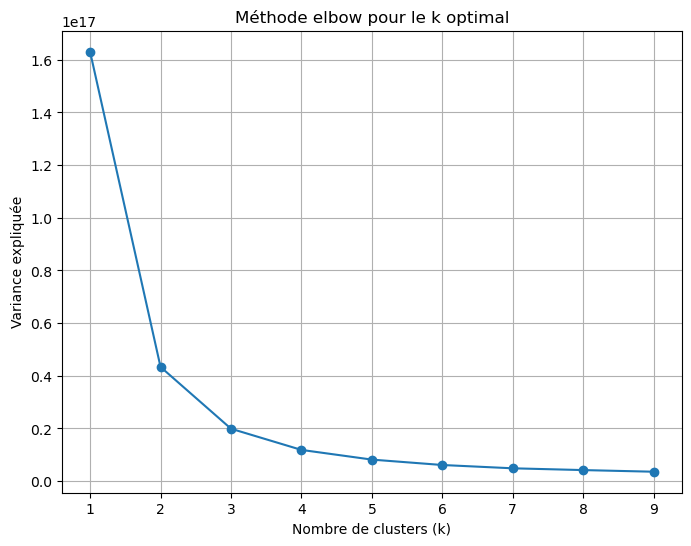

In [378]:
# Nous commençons par chercher quelle est la valeur optimale de k pour l'algorithme k-means, avec la méthode de l'elbow
k_values = range(1, 10)

df_elbow = df_encoded.copy()

# Initialisation d'une liste pour contenir les variances expliquées
explained_variances = []

# Itération sur les différentes valeurs de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_elbow)
    
    explained_variances.append(kmeans.inertia_)

# Plot the explained variances against the number of clusters
# Visualisation des variances expliqués en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(k_values, explained_variances, marker='o', linestyle='-')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Variance expliquée')
plt.title('Méthode elbow pour le k optimal')
plt.grid(True)
plt.show()

En observant le graphique, on déduit que la valeur optimale de k est 3.

In [382]:
from sklearn.cluster import KMeans

kmeans_data = df_encoded.copy()
kmeans_data = standardize(kmeans_data, continuous_vars)

k = 3

# K-means clustering
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans_data['cluster'] = kmeans.fit_predict(kmeans_data)

# Exploration des différent clusters
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=kmeans_data.columns[:-1])
cluster_centers['cluster'] = range(k)
cluster_centers.set_index('cluster', inplace=True)

# Taille des clusters
cluster_sizes = kmeans_data['cluster'].value_counts()

/Users/hamza/opt/anaconda3/envs/adaexam/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [383]:
cluster_sizes

2    105225
0    104206
1     97908
Name: cluster, dtype: int64

In [384]:
# Calcul du centre des clusters
cluster_centers = kmeans.cluster_centers_

cluster_centers_df = pd.DataFrame(cluster_centers, columns=kmeans_data.columns[:-1])

# Itération sur chaque centre de cluster, pour analyser leurs valeurs
for cluster_num, center_values in enumerate(cluster_centers):
    print(f"Cluster {cluster_num + 1} Center:")
    for feature, value in zip(kmeans_data.columns[:-1], center_values):
        print(f"{feature}: {value:.2f}")
    print("\n")

Cluster 1 Center:
name: 95737.94
price: -0.00
vehicletype: 3.56
yearofregistration: -0.06
gearbox: 0.76
powerps: 0.00
model: 96.70
kilometer: -0.02
monthofregistration: -0.01
fueltype: 1.75
brand: 22.95
notrepaireddamage: 0.10
postalcode: -0.02
time_online: -0.01
year_published: 0.00
month_published: 0.00


Cluster 2 Center:
name: 157959.94
price: -0.11
vehicletype: 3.60
yearofregistration: 0.03
gearbox: 0.84
powerps: -0.32
model: 141.66
kilometer: -0.02
monthofregistration: -0.00
fueltype: 1.69
brand: 33.33
notrepaireddamage: 0.09
postalcode: -0.07
time_online: -0.01
year_published: -0.00
month_published: 0.00


Cluster 3 Center:
name: 31105.64
price: 0.11
vehicletype: 3.53
yearofregistration: 0.03
gearbox: 0.74
powerps: 0.29
model: 66.24
kilometer: 0.04
monthofregistration: 0.01
fueltype: 1.67
brand: 5.64
notrepaireddamage: 0.09
postalcode: 0.08
time_online: 0.02
year_published: 0.00
month_published: -0.00




En observant les centres de chaque cluster, on trouve 4 champs nous permettant de catégoriser les profils : Le prix (price), l'année d'immatriculation (yearofregistration), le nombre de chevaux (powerps), ainsi que le kilometrage (kilometer).  

- Le premier cluster contient les voitures à prix moyens, ni trop chères, ni très abordable. Ce dernier contient également les voitures les plus anciennes mais aussi celles avec des dommages non-réparés.
- Le second cluster contient les voitures les moins chères, avec le plus petit nombre de chevaux.
- Le troisième cluster contient les voitures les plus chères, les plus récentes, avec le plus grand nombre de chevaux et le plus de kilometrage.

### Données corrélées avec le prix

In [166]:
df_encoded.head()

,name,seller,offertype,price,abtest,vehicletype,yearofregistration,gearbox,powerps,model,kilometer,monthofregistration,fueltype,brand,notrepaireddamage,nrofpictures,postalcode,time_online,year_published,month_published
0,67157.0,0.0,0.0,480,1.0,3.0,-1.357753,1.0,-0.502748,118.0,0.626076,-1.592060,2.0,38.0,0.0,0.0,0.740415,0.483374,0.009655,-0.404672
1,3159.0,0.0,0.0,18300,1.0,1.0,1.105230,1.0,0.871753,118.0,0.004942,-0.225886,1.0,1.0,1.0,0.0,0.605334,0.480308,0.009655,-0.404672
2,76290.0,0.0,0.0,9800,1.0,2.0,0.147403,0.0,0.413586,119.0,0.004942,0.593818,1.0,14.0,0.0,0.0,1.518268,1.491703,0.009655,-0.404672
3,65158.0,0.0,0.0,1500,1.0,6.0,-0.263094,1.0,-0.502748,118.0,0.626076,0.047349,2.0,38.0,0.0,0.0,1.541318,-1.159222,0.009655,-0.404672
4,143944.0,0.0,0.0,3600,1.0,6.0,0.694732,1.0,-0.502748,103.0,-0.864645,0.320583,1.0,31.0,0.0,0.0,0.352439,-0.474826,0.009655,-0.404672


In [364]:
# Même si les champs catégorielles ont été encodés, ils ont gardé le type object.
# On modifie donc le type vers float
for feature in categorical_vars:
    df_encoded[feature] = df_encoded[feature].astype(float)

In [168]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312431 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   name                 312431 non-null  float64
 1   seller               312431 non-null  float64
 2   offertype            312431 non-null  float64
 3   price                312431 non-null  int64  
 4   abtest               312431 non-null  float64
 5   vehicletype          312431 non-null  float64
 6   yearofregistration   312431 non-null  float64
 7   gearbox              312431 non-null  float64
 8   powerps              312431 non-null  float64
 9   model                312431 non-null  float64
 10  kilometer            312431 non-null  float64
 11  monthofregistration  312431 non-null  float64
 12  fueltype             312431 non-null  float64
 13  brand                312431 non-null  float64
 14  notrepaireddamage    312431 non-null  float64
 15  nrofpictures     

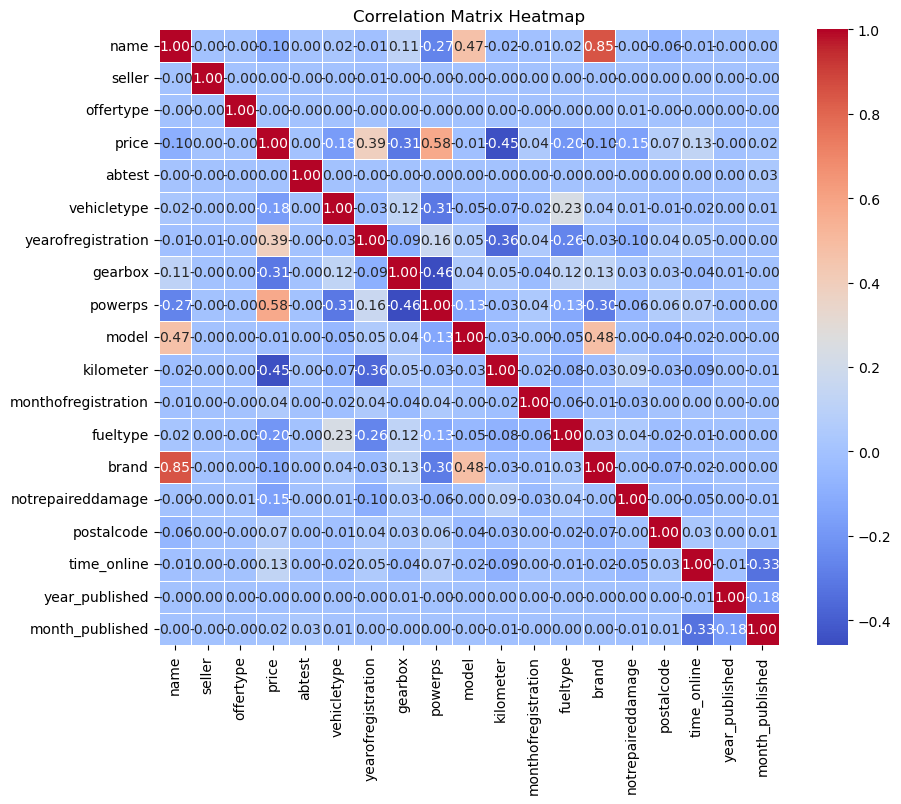

In [367]:
# Matrice de corrélation
correlation_matrix = df_encoded.drop(columns=['nrofpictures']).corr()

# Heatmap de la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [368]:
# Extraction des valeurs de corrélation entre le prix et les autres variables
correlation_with_target = correlation_matrix['price']

sorted_correlation = correlation_with_target.abs().sort_values(ascending=False)

print(sorted_correlation)

price                  1.000000
powerps                0.576799
kilometer              0.446075
yearofregistration     0.387858
gearbox                0.307790
fueltype               0.199977
vehicletype            0.178215
notrepaireddamage      0.152403
time_online            0.129234
brand                  0.100582
name                   0.098961
postalcode             0.072984
monthofregistration    0.043806
month_published        0.015663
model                  0.009844
year_published         0.004724
abtest                 0.001640
offertype              0.001633
seller                 0.000128
Name: price, dtype: float64


En observant les valeurs des corrélations, on déduit que : 

- Les variables powerps, kilometer, yearofreistration et gearbox sont modéremment corrélés positivement au prix.
- Les variables vehicletype, fueltype, notrepaireddammage, time_online et brand ont une faible corrélation positive au prix.
- Les autres variables ont des corélations trop faibles avec le prix.

### Variables catégorielles

Concernant les champs catégorielles, nous les avons encodés avec un encodage one-hot. Cela pour pouvoir les utiliser dans les modèles de regression, mais aussi pour le clustering et la matrice de corrélation

### Réduction du nombres de variables

In [370]:
# Variable nrofpictures
df_encoded['nrofpictures'].unique()

array([0.])

La variable nrofpictures ne contient qu'une seule valeur, il ne sert donc à rien de la garder et nous pouvons la supprimer

In [371]:
df_encoded.drop(columns=['nrofpictures'], inplace=True)

<AxesSubplot: >

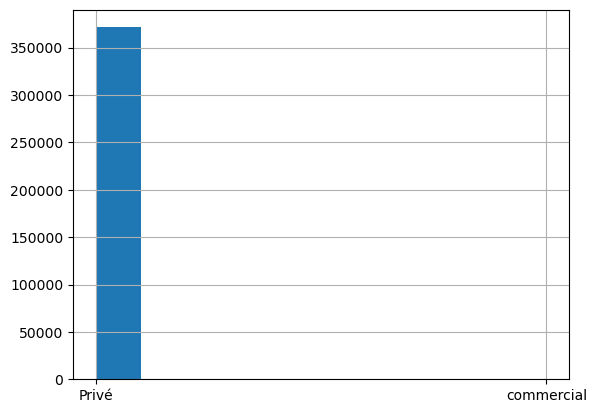

In [91]:
# Variable seller
data['seller'].hist()

In [92]:
data['seller'].unique()

array(['Privé', 'commercial'], dtype=object)

In [102]:
print('Pourcentage de \'Privé\' pour la variable seller : ', len(df_encoded['seller'][df_encoded['seller']==1])/len(df_encoded)*100)

Pourcentage de 'Privé' pour la variable seller :  0.0009602120148128708


On observe que la variable seller contient majoritairement la valeur 'Privé', avec seulement 0.0009% pour la valeur 'commercial'. Nous pouvons donc égalament la supprimer

In [372]:
df_encoded.drop(columns=['seller'], inplace=True)

<AxesSubplot: >

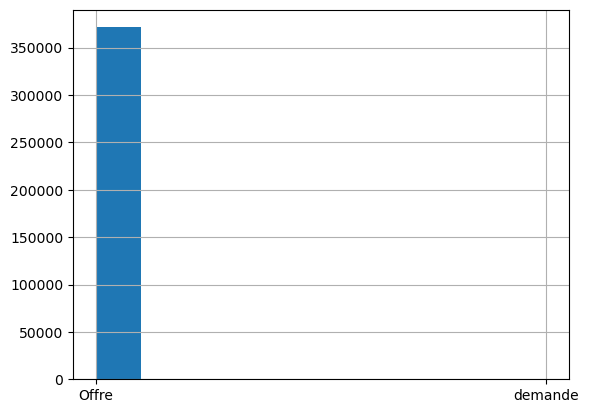

In [96]:
data['offertype'].hist()

In [103]:
print('Pourcentage d\'Offre\' pour la variable offertype : ', len(df_encoded['offertype'][df_encoded['offertype']==1])/len(df_encoded)*100)

Pourcentage d'Offre' pour la variable offertype :  0.001600353358021451


Encore une fois, on observe que la variable offertype contient majoritairement la valeur 'Offre', avec seulement 0.001% de 'demande'. Nous pouvons donc égalament la supprimer

In [373]:
df_encoded.drop(columns=['offertype'], inplace=True)

La variable abtest correspond à un test statistique surlequel nous n'avons aucune information. De plus à travers la matrice de corrélation, on observe que la corrélation entre abtest et le prix est presque nulle (0.001640). On peut ainsi supprimer cette variable.

In [374]:
df_encoded.drop(columns=['abtest'], inplace=True)

### Variables importantes lors du pricing

Il y a différentes méthodes pour determiner quelles sont les variables importantes lors du pricing. Nous pouvons utiliser la corrélation entre les features et le prix, mais il est plus intéressant d'observer l'importnace des features après avoir entraîner des modèles de regression sur les données.

Ainsi pour determiner les variables importantes pour le prédiction du prix (avant d'implémenter le moteur de pricing), nous allons faire une regression linéaire sur le prix et analyser les coefficients 

In [375]:
from sklearn.linear_model import LinearRegression

X = df_encoded[df_encoded.columns.difference(['price'])]
y = df_encoded['price']

model = LinearRegression()

model.fit(X, y)

# Obtention des coefficients pour chaque champ
coefficients = pd.Series(model.coef_, index=df_encoded.columns.difference(['price']))

print("Coefficients:")
print(coefficients)

Coefficients:
brand                    50.208106
fueltype              -2036.683403
gearbox                -525.778964
kilometer                -0.080015
model                     1.863081
month_published         632.694684
monthofregistration       5.238052
name                     -0.005680
notrepaireddamage     -1854.158488
postalcode                0.007812
powerps                  68.965334
time_online               0.000642
vehicletype             -36.791647
year_published         3097.816182
yearofregistration      148.265918
dtype: float64


En analysant ces coefficients, on peut déduire que les variables importantes lors du pricing sont (dans le cas de la regression linéaire) : 
- powerps, fueltype, kilometer, notrepareddamage, year_published, gearbox, month_published  

Nous allons plus approfondir cet aspect après l'implémentation du moteur de pricing

### Autres axes à considérer ?

Un autre axe que nous avons considéré au cours de notre étude est le *Feature Engineering*. En effet precedemment, nous avons utiliser les variables datecrawled, lastseen et datecreated pour créer de nouvelles variables.

- La première étant le temps que l'annonce est restée visible en ligne avant que la voiture ne soit achetée. Cela en soustrayant datecrawled à lastseen
- La seconde étant le mois ainsi que l'année de publication de l'offre, à travers datecreated

### Moteur de Pricing

In [171]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [172]:
model_data = df_encoded.copy()

In [389]:
# Train/Test split : 80%-20%

X = df_encoded[df_encoded.columns.difference(['price'])]
Y = df_encoded['price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

Pour le moteur de pricing nous allons utiliser 3 modèles : 

- Random Forest
- XGBoost
- Gradient boosting

#### Random Forest

In [390]:
RFR = RandomForestRegressor()

RFR.fit(X_train, Y_train)

pred = RFR.predict(X_test)

R2_score = r2_score(Y_test,pred)*100

print('R2_score:', R2_score)
print('mean_squared_error:', mean_squared_error(Y_test,pred))
print('mean_absolute_error:', mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:', np.sqrt(mean_squared_error(Y_test,pred)))

R2_score: 88.01397062896443
mean_squared_error: 8215525.755794209
mean_absolute_error: 1207.2861693755358
root_mean_squared_error: 2866.2738452203425


#### XGB Regressor

In [377]:
XGB = XGBRegressor()

XGB.fit(X_train, Y_train)

pred = XGB.predict(X_test)

R2_score = r2_score(Y_test,pred)*100

print('R2_score:', R2_score)
print('mean_squared_error:', mean_squared_error(Y_test,pred))
print('mean_absolute_error:', mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:', np.sqrt(mean_squared_error(Y_test,pred)))

R2_score: 87.70314398580801
mean_squared_error: 8428574.148501258
mean_absolute_error: 1327.0715061110413
root_mean_squared_error: 2903.200673136678


#### Gradient boosting regressor

In [396]:
GBR = GradientBoostingRegressor()

GBR.fit(X_train, Y_train)

pred = GBR.predict(X_test)

R2_score = r2_score(Y_test,pred)*100

print('R2_score:',R2_score)
print('mean_squared_error:', mean_squared_error(Y_test,pred))
print('mean_absolute_error:', mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:', np.sqrt(mean_squared_error(Y_test,pred)))

R2_score: 80.1559051142988
mean_squared_error: 13601641.343201283
mean_absolute_error: 1707.0815463136257
root_mean_squared_error: 3688.040312035822


#### Variables importantes après prediction

Nous nous basons sur les résultats de RandomForest pour étudier les variables importantes, étant l'algorithme avec le meilleure score r2.

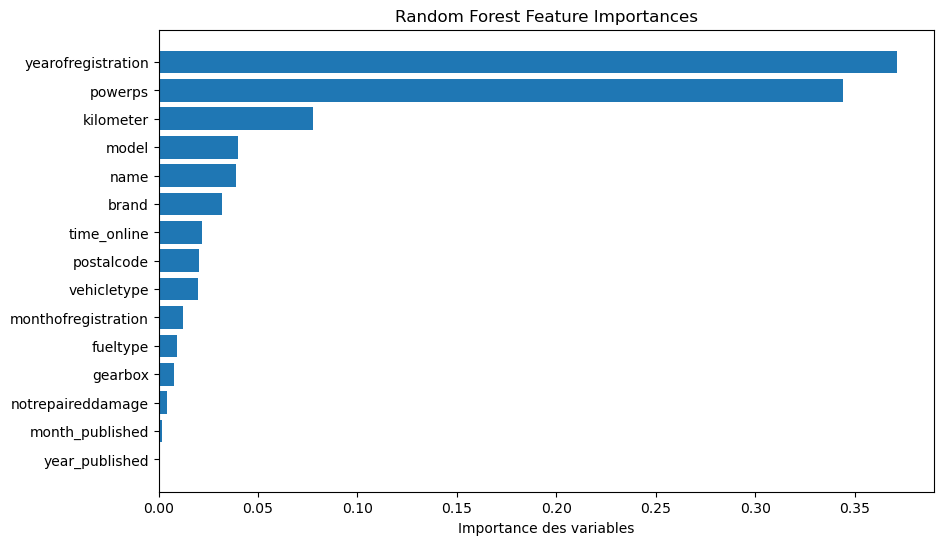

In [395]:
feature_names = X_train.columns

feature_importances = RFR.feature_importances_
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align="center")
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel("Importance des variables")
plt.title("Random Forest Feature Importances")
plt.show()